#Automatic Financial Data Downloader

In [44]:
#!pip install quandl
import pandas as pd
import quandl
import datetime
import matplotlib
import numpy as np
import matplotlib.pyplot as plt   # Import matplotlib
import pandas_datareader.data as web

%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots

#work in scrum and agile environments
#experience with docker containers, microservices
#https://eco.sapo.pt/2019/02/26/definedcrowd-vai-contratar-mais-70-profissionais-de-inteligencia-artificial-ate-ao-final-do-ano-ha-vagas-em-lisboa-e-no-porto/
#https://careers.definedcrowd.com/o/machine-learning-engineer-lisbon
  

# The user starts by inputting the start and end date of the time interval to analyze
d_cont=1
while d_cont==1:
  try:
    date=input("Insert start date in the format YYYY,MM,DD:")
    date=date.split(",")
    start = datetime.datetime(int(date[0]),int(date[1]),int(date[2]))
    d_cont=0
  except:
    print('Wrong date format, please try again')

    
d_cont=1
while d_cont==1:
  try:
    date=input("Insert end date in the format YYYY,MM,DD:")
    date=date.split(",")
    end = datetime.datetime(int(date[0]),int(date[1]),int(date[2]))
    #end = datetime.date.today() #end day being the current day
    d_cont=0
  except:
    print('Wrong date format, please try again')
 


Insert start date in the format YYYY,MM,DD:2016,1,1
Insert end date in the format YYYY,MM,DD:2019,1,1


In [63]:
cont="y"
stocks=pd.DataFrame()
fin_dict={}

# Ask the user for the tick symbols of the financial markets to analyze
while cont== "y" or cont=="Y":
  tick=input("Insert tick symbol for stock:")
  try:
    stock= web.DataReader(tick, 'yahoo', start, end)["Adj Close"]
    fin_dict.update({tick:stock})
  except:
    print('It was not possible to retrieve the data')  
  
  cont=input("Continue?") #y for yes, n for no

stocks = pd.DataFrame(fin_dict) #Save the Adj Close values from the chosen stocks to a dataframe

if (stocks.isnull().values.any()): #Check for missing values
  stocks=stocks.dropna() # Drop rows with missing values
  print('Missing values deleted')

Insert tick symbol for stock:AAPL
Continue?y
Insert tick symbol for stock:MSFT
Continue?y
Insert tick symbol for stock:KO
Continue?y
Insert tick symbol for stock:WMT
Continue?n


,AAPL,KO,MSFT,WMT
Date,,,,
2016-01-04,99.499107,38.401993,51.065639,56.870766
2016-01-05,97.005730,38.537842,51.298611,58.221748
2016-01-06,95.107361,38.329536,50.366753,58.804699
2016-01-07,91.093399,37.695538,48.614864,60.174198
2016-01-08,91.575073,37.595905,48.763962,58.795456


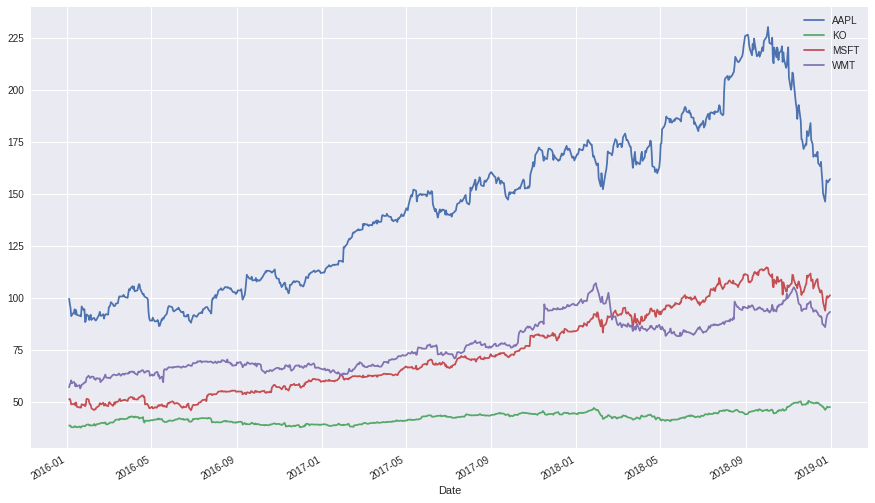

In [66]:
stocks.plot(grid = True)
stocks.head()

#Metrics

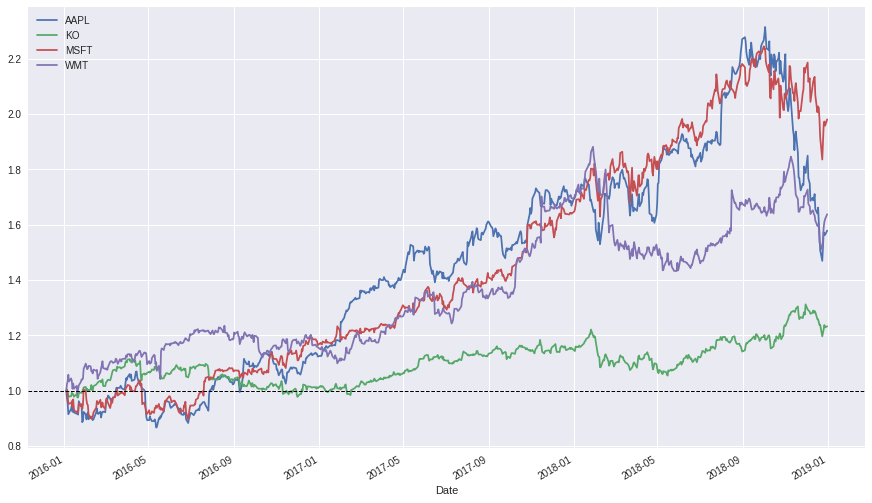

In [73]:
#Calculate and plot the ROR for each analyzed financial market

stock_return = stocks.apply(lambda x: x / x[0])
stock_return.head() - 1
stock_return.plot(grid = True).axhline(y = 1, color = "black", lw = 1, linestyle= '--')

In [74]:
#Calculate the Sharpe Ratio

def Sharpe_ratio(stock):
  sharpe_buy=np.full_like(stock_return,0)
  SR_buy=np.full_like(stock_return,0)
  for sharpe_aux1 in range(0,len(sharpe_buy)):
    sharpe_buy[sharpe_aux1]=stock_return[stock][sharpe_aux1]-stock_return[stock][0]
  SR_buy=(np.mean(sharpe_buy)/np.std(sharpe_buy))
  return SR_buy

#Print some important metrics
for name in list(stocks):
  print('Buy & Hold return for ', name, ':', (stock_return[name][-1]-1)*100, '%')
  print('Sharpe Ratio for', name, ':', (Sharpe_ratio(name)))

Buy & Hold return for  AAPL : 57.857070177334016 %
Sharpe Ratio for AAPL : 1.1617212631622733
Buy & Hold return for  KO : 23.30088889754216 %
Sharpe Ratio for KO : 1.3950562336738956
Buy & Hold return for  MSFT : 98.05503299542953 %
Sharpe Ratio for MSFT : 1.1004927972810108
Buy & Hold return for  WMT : 63.792416722731524 %
Sharpe Ratio for WMT : 1.6423526983046053
